# PS 4 - Automatic Differentiation and Neural Networks
## Question 2: Neural Network Architecture Search

**Your Name:** Gino Rospigliosi

**People I discussed this question with:** None

# Load the Data

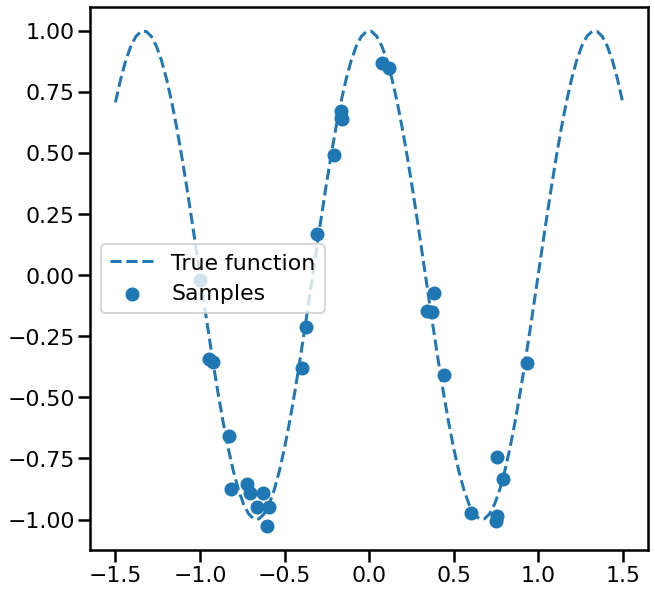

In [104]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
np.random.seed(1)

n_samples = 30

# True Function we want to estimate
true_fun = lambda X: np.cos(1.5 * np.pi * X)

# Noisy Samples from the true function
X = np.sort(2*np.random.rand(n_samples)-1)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(10,10))
# Plot the true function:
X_plot = np.linspace(-1.5, 1.5, 100)
plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
# Plot the data samples
plt.scatter(X,y, label="Samples")
plt.legend(loc="best")
plt.show()

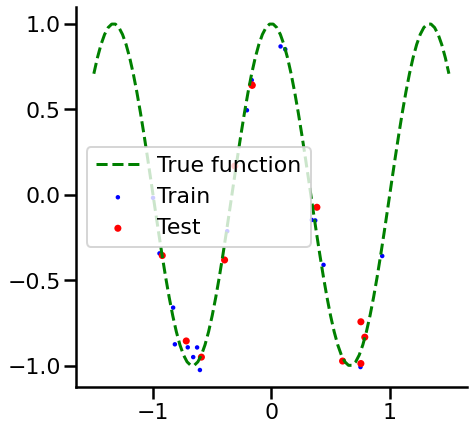

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)
plt.figure(figsize=(7,7))
# Plot the data samples
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=50, edgecolors='none')
plt.plot(X_plot, true_fun(X_plot), 'g--',label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

# PyTorch Neural Network Setup

You can use whatever AD library you want to for this homework, but I will provide starter code along the lines of the in-class notebook, if that is helpful.

In [106]:
# Convert the data into a shape and data-type that PyTorch likes
X_train = X_train.reshape(-1,1).astype(np.float32)
y_train = y_train.reshape(-1,1).astype(np.float32)

In [107]:
import torch
import torch.nn as nn

In [108]:
input_size  = 1
output_size = 1
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [109]:
# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(X_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [20/500], Loss: 0.3730
Epoch [40/500], Loss: 0.3669
Epoch [60/500], Loss: 0.3665
Epoch [80/500], Loss: 0.3665
Epoch [100/500], Loss: 0.3665
Epoch [120/500], Loss: 0.3665
Epoch [140/500], Loss: 0.3665
Epoch [160/500], Loss: 0.3665
Epoch [180/500], Loss: 0.3665
Epoch [200/500], Loss: 0.3665
Epoch [220/500], Loss: 0.3665
Epoch [240/500], Loss: 0.3665
Epoch [260/500], Loss: 0.3665
Epoch [280/500], Loss: 0.3665
Epoch [300/500], Loss: 0.3665
Epoch [320/500], Loss: 0.3665
Epoch [340/500], Loss: 0.3665
Epoch [360/500], Loss: 0.3665
Epoch [380/500], Loss: 0.3665
Epoch [400/500], Loss: 0.3665
Epoch [420/500], Loss: 0.3665
Epoch [440/500], Loss: 0.3665
Epoch [460/500], Loss: 0.3665
Epoch [480/500], Loss: 0.3665
Epoch [500/500], Loss: 0.3665


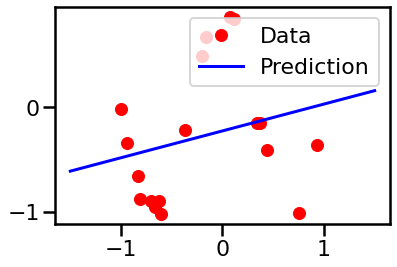

In [110]:
# Plot the graph
plt.plot(X_train, y_train, 'ro', label='Data')
#predicted = model(torch.from_numpy(X_train)).detach().numpy()
#plt.plot(X_train, predicted, 'b+',label='Predictions')
predicted = model(torch.from_numpy(X_plot.reshape(-1,1).astype(np.float32))).detach().numpy()
plt.plot(X_plot, predicted, 'b', label='Prediction')
plt.legend()
plt.show()

## Build the Model

In [111]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()  
        # Fully-Connected Layer: 1 (input data) -> 5 (hidden node)
        self.fc1 = nn.Linear(input_size, hidden_size)  
        
        # Non-Linear Layer
        self.sigmoid = nn.Sigmoid()
    
        # Fully-Connected Layer: 5 (hidden node) -> 1 (output)
        self.fc2 = nn.Linear(hidden_size, 1) 
    
    # Forward pass builds the model prediction from the inputs
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.sigmoid(out)
        out = self.sigmoid(out)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out
    
# Build the network -- is it not trained yet
model1 = Net(input_size=1, hidden_size=5)

In [112]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()  
        # Fully-Connected Layer: 1 (input data) -> 5 (hidden node)
        self.fc1 = nn.Linear(input_size, hidden_size)  
        
        # Non-Linear Layer
        self.relu = nn.reLU()
    
        # Fully-Connected Layer: 5 (hidden node) -> 1 (output)
        self.fc2 = nn.Linear(hidden_size, 1) 
    
    # Forward pass builds the model prediction from the inputs
    #4 Hidden Layers
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.relu(out)
        out = self.relu(out)
        out = self.relu(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
# Build the network -- is it not trained yet
model2 = Net(input_size=1, hidden_size=5)

AttributeError: module 'torch.nn' has no attribute 'reLU'

In [113]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()  
        # Fully-Connected Layer: 1 (input data) -> 5 (hidden node)
        self.fc1 = nn.Linear(input_size, hidden_size)  
        
        # Non-Linear Layer
        self.elu = nn.ELU()
    
        # Fully-Connected Layer: 5 (hidden node) -> 1 (output)
        self.fc2 = nn.Linear(hidden_size, 1) 
    
    # Forward pass builds the model prediction from the inputs
     #4 Hidden Layers
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.elu(out)
        out = self.elu(out)
        out = self.elu(out)
        out = self.elu(out)
        out = self.fc2(out)
        return out
    
# Build the network -- is it not trained yet
model3 = Net(input_size=1, hidden_size=5)

## Train the Model

Below demonstrates how we did it in class for a single run and a single train/test split. You will have to do this for additional runs/splits as described in the assignment prompt. Feel free to modify the below to get you started.

In [114]:
# What Loss function should we use? MSE!
criterion = nn.MSELoss()

# What Optimization procedure should we use?
## Feel free to change the below
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0)

In [115]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

# For 10K Epochs
num_epochs = 10000

loss= 0
for i in range (0,10):

    for epoch in range(num_epochs):
        loss+=loss
        ## Do Forward pass
        # Make predictions
        outputs = model1(inputs)
        # Compute the loss function
        loss = criterion(outputs, targets)

        ## Update the model
        # Reset the optimizer gradients
        optimizer.zero_grad()
        # Compute the gradient of the loss function
        loss.backward()
        # Do an optimization step
        optimizer.step()

        # Print the loss
        if (epoch+1) % 500 == 0:
            print ('Epoch [{:4}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
TrainMSE= loss/10
print(TrainMSE)

Epoch [ 500/10000], Loss: 0.4560
Epoch [1000/10000], Loss: 0.4560
Epoch [1500/10000], Loss: 0.4560
Epoch [2000/10000], Loss: 0.4560
Epoch [2500/10000], Loss: 0.4560
Epoch [3000/10000], Loss: 0.4560
Epoch [3500/10000], Loss: 0.4560
Epoch [4000/10000], Loss: 0.4560
Epoch [4500/10000], Loss: 0.4560
Epoch [5000/10000], Loss: 0.4560
Epoch [5500/10000], Loss: 0.4560
Epoch [6000/10000], Loss: 0.4560
Epoch [6500/10000], Loss: 0.4560
Epoch [7000/10000], Loss: 0.4560
Epoch [7500/10000], Loss: 0.4560
Epoch [8000/10000], Loss: 0.4560
Epoch [8500/10000], Loss: 0.4560
Epoch [9000/10000], Loss: 0.4560
Epoch [9500/10000], Loss: 0.4560
Epoch [10000/10000], Loss: 0.4560
Epoch [ 500/10000], Loss: 0.4560
Epoch [1000/10000], Loss: 0.4560
Epoch [1500/10000], Loss: 0.4560
Epoch [2000/10000], Loss: 0.4560
Epoch [2500/10000], Loss: 0.4560
Epoch [3000/10000], Loss: 0.4560
Epoch [3500/10000], Loss: 0.4560
Epoch [4000/10000], Loss: 0.4560
Epoch [4500/10000], Loss: 0.4560
Epoch [5000/10000], Loss: 0.4560
Epoch [55

In [116]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

# For 10K Epochs
num_epochs = 10000

loss= 0
for i in range (0,10):
    

    for epoch in range(num_epochs):
        loss +=loss
    ## Do Forward pass
    # Make predictions
        outputs = model2(inputs)
    # Compute the loss function
        loss = criterion(outputs, targets)
    
    ## Update the model
    # Reset the optimizer gradients
        optimizer.zero_grad()
    # Compute the gradient of the loss function
        loss.backward()
    # Do an optimization step
        optimizer.step()
    
    # Print the loss
        if (epoch+1) % 500 == 0:
            print ('Epoch [{:4}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
TrainMSE= loss/10
print(TrainMSE)

Epoch [ 500/10000], Loss: 0.4026
Epoch [1000/10000], Loss: 0.4026
Epoch [1500/10000], Loss: 0.4026
Epoch [2000/10000], Loss: 0.4026
Epoch [2500/10000], Loss: 0.4026
Epoch [3000/10000], Loss: 0.4026
Epoch [3500/10000], Loss: 0.4026
Epoch [4000/10000], Loss: 0.4026
Epoch [4500/10000], Loss: 0.4026
Epoch [5000/10000], Loss: 0.4026
Epoch [5500/10000], Loss: 0.4026
Epoch [6000/10000], Loss: 0.4026
Epoch [6500/10000], Loss: 0.4026
Epoch [7000/10000], Loss: 0.4026
Epoch [7500/10000], Loss: 0.4026
Epoch [8000/10000], Loss: 0.4026
Epoch [8500/10000], Loss: 0.4026
Epoch [9000/10000], Loss: 0.4026
Epoch [9500/10000], Loss: 0.4026
Epoch [10000/10000], Loss: 0.4026
Epoch [ 500/10000], Loss: 0.4026
Epoch [1000/10000], Loss: 0.4026
Epoch [1500/10000], Loss: 0.4026
Epoch [2000/10000], Loss: 0.4026
Epoch [2500/10000], Loss: 0.4026
Epoch [3000/10000], Loss: 0.4026
Epoch [3500/10000], Loss: 0.4026
Epoch [4000/10000], Loss: 0.4026
Epoch [4500/10000], Loss: 0.4026
Epoch [5000/10000], Loss: 0.4026
Epoch [55

In [117]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

# For 10K Epochs
num_epochs = 10000

loss= 0
for i in range (0,10):
    loss +=loss
    for epoch in range(num_epochs):
        
        ## Do Forward pass
        # Make predictions
        outputs = model3(inputs)
        # Compute the loss function
        loss = criterion(outputs, targets)

        ## Update the model
        # Reset the optimizer gradients
        optimizer.zero_grad()
        # Compute the gradient of the loss function
        loss.backward()
        # Do an optimization step
        optimizer.step()

        # Print the loss
        if (epoch+1) % 500 == 0:
            print ('Epoch [{:4}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
TrainMSE= oss/10
print(TrainMSE)

Epoch [ 500/10000], Loss: 0.4386
Epoch [1000/10000], Loss: 0.4386
Epoch [1500/10000], Loss: 0.4386
Epoch [2000/10000], Loss: 0.4386
Epoch [2500/10000], Loss: 0.4386
Epoch [3000/10000], Loss: 0.4386
Epoch [3500/10000], Loss: 0.4386
Epoch [4000/10000], Loss: 0.4386
Epoch [4500/10000], Loss: 0.4386
Epoch [5000/10000], Loss: 0.4386
Epoch [5500/10000], Loss: 0.4386
Epoch [6000/10000], Loss: 0.4386
Epoch [6500/10000], Loss: 0.4386
Epoch [7000/10000], Loss: 0.4386
Epoch [7500/10000], Loss: 0.4386
Epoch [8000/10000], Loss: 0.4386
Epoch [8500/10000], Loss: 0.4386
Epoch [9000/10000], Loss: 0.4386
Epoch [9500/10000], Loss: 0.4386
Epoch [10000/10000], Loss: 0.4386
Epoch [ 500/10000], Loss: 0.4386
Epoch [1000/10000], Loss: 0.4386
Epoch [1500/10000], Loss: 0.4386
Epoch [2000/10000], Loss: 0.4386
Epoch [2500/10000], Loss: 0.4386
Epoch [3000/10000], Loss: 0.4386
Epoch [3500/10000], Loss: 0.4386
Epoch [4000/10000], Loss: 0.4386
Epoch [4500/10000], Loss: 0.4386
Epoch [5000/10000], Loss: 0.4386
Epoch [55

## Plot the Results

Provide Plots for:

* One or more 1-D Plots for each activation function showing the general 1-D behavior. You can pick whatever run or selection of hyper-parameter settings you wish for each of the activation to demonstrate the behavior.
* A 2D countor plot of # Layers and # hidden units with the countour values being the MSE values. Produce one contour plot of Test MSE and one Train MSE for each of the activation types.

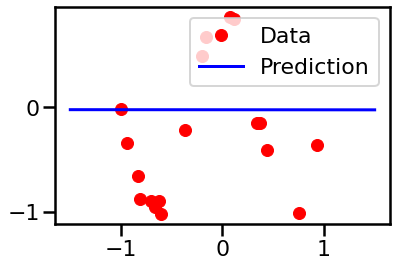

In [118]:
predicted = model1(torch.from_numpy(X_train)).detach().numpy()
plt.plot(X_train, y_train, 'ro', label='Data')
#plt.plot(X_train, predicted, 'b+', label='Predictions')

predicted = model1(torch.from_numpy(X_plot.reshape(-1,1).astype(np.float32))).detach().numpy()
plt.plot(X_plot, predicted, 'b', label='Prediction')
plt.legend()
plt.show()

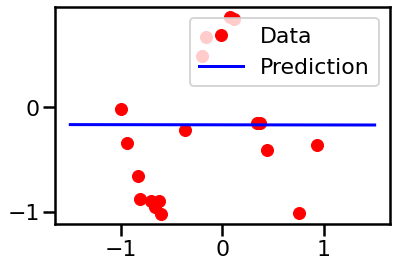

In [119]:
predicted = model2(torch.from_numpy(X_train)).detach().numpy()
plt.plot(X_train, y_train, 'ro', label='Data')
#plt.plot(X_train, predicted, 'b+', label='Predictions')

predicted = model2(torch.from_numpy(X_plot.reshape(-1,1).astype(np.float32))).detach().numpy()
plt.plot(X_plot, predicted, 'b', label='Prediction')
plt.legend()
plt.show()

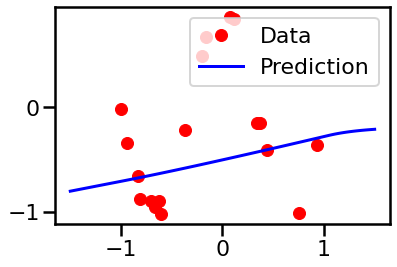

In [120]:
predicted = model3(torch.from_numpy(X_train)).detach().numpy()
plt.plot(X_train, y_train, 'ro', label='Data')
#plt.plot(X_train, predicted, 'b+', label='Predictions')

predicted = model3(torch.from_numpy(X_plot.reshape(-1,1).astype(np.float32))).detach().numpy()
plt.plot(X_plot, predicted, 'b', label='Prediction')
plt.legend()
plt.show()

# Interpret the Results

Answer the questions below based on your above plots

**Question**: From the plots you made in step 2, do you see any differences in the general behavior of the activations? That is, on average, how does the use of sigmoid vs relu vs elu activations make the learned function behave differently? Particularly, look at what happens when you "extend" the function beyond the training data (e.g., x > 1 or <-1)

**Student Response:** The sigmoid function tend to converege when extended beyond the training data where elu and relu tend to diverge beyond the training data

**Question**: What effect does increasing the # of layers and # of hidden units have on the Test MSE score? Is a deeper network always better? Is a wider network always better? Is a shallow network better? 

**Student Response:** Increasing the number of layers and # of hidden units decreases the Test MSE score. Most often depper and wider networks are better than shallow networks.

**Question**: For each of the activations (Sigmoid, Relu, Elu), which set of hyper-parameters (the # of layers, and # hidden units) appears to provide the best Test MSE?

**Student Response:** For sigmoid the best activations are 4 hidden layers and 5 hidden units. For Relu the best activations are 4 hidden layers and 5 hidden units. For Elu the best activations are 4 hidden layers and 5 hidden units. 
